## Q1.Linear Classification

In [28]:
from csv import reader
# Load CSV file
def load_csv(filename):
    file = open(filename, "r")
    lines = reader(file)
    dataset = list(lines)
    return dataset
#change all data format from string to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

def csv_format_chage(file_data):
    for i in range(len(file_data[0])):
        str_column_to_float(file_data, i)
    return file_data
#train_data : +1  -1 for the two types

In [29]:
#prep data
filename=r"C:\Users\gaoyu\Desktop\hw1\data\1\train_1_5.csv"
filename1=r"C:\Users\gaoyu\Desktop\hw1\data\1\test_1_5.csv"
train_data=load_csv(filename)
test_data=load_csv(filename1)
train_data=csv_format_chage(train_data)
test_data=csv_format_chage(test_data)
print("done")

done


In [30]:
#assume linear classifier with offset theta=(theta1,theta2) theta0
import numpy as np
theta = np.array([float(0), float(0)])
theta0=float(0)

In [31]:
def one_iter(train_data,theta,theta0):
    up=0
    for i in train_data:
        x=np.array([i[0],i[1]])#input
        y=i[2]#label
        pred=np.dot(x,theta)+theta0
    
        check=pred*y
        #unpdate thetas
        
        if check<0 or check==0 :
            up+=1
            theta+=y*x
            theta0+=y
        else:
            continue
    return theta,theta0

In [32]:
theta,theta0=one_iter(train_data,theta,theta0)

In [33]:
theta,theta0

(array([-2.4483233 , -5.88190688]), 0.0)

In [34]:
def test_accuracy(test_data,theta,theta0):
    correct=0
    wrong=0
    ls=[]
    for i in test_data:
        x=np.array([i[0],i[1]])#input
        y=i[2]#label
        pred=np.dot(x,theta)+theta0
        ls.append(pred)
        check=pred*y
        #unpdate thetas
        if check<0 or check==0:
            wrong+=1
        else:
            correct+=1
    accuracy=correct/(correct+wrong)
    print(accuracy)
      

In [35]:
def experiment(num):
    theta = np.array([float(0), float(0)])
    theta0=float(0)
    for i in range(num):
        print("iteration "+str(i)+":")
        theta,theta0=one_iter(train_data,theta,theta0)
        test_accuracy(test_data,theta,theta0)
        print("\n")

In [36]:
experiment(5)

iteration 0:
0.9670658682634731


iteration 1:
0.9650698602794411


iteration 2:
0.9500998003992016


iteration 3:
0.969061876247505


iteration 4:
0.9670658682634731




In [37]:
experiment(10)

iteration 0:
0.9670658682634731


iteration 1:
0.9650698602794411


iteration 2:
0.9500998003992016


iteration 3:
0.969061876247505


iteration 4:
0.9670658682634731


iteration 5:
0.9670658682634731


iteration 6:
0.9670658682634731


iteration 7:
0.9670658682634731


iteration 8:
0.9680638722554891


iteration 9:
0.9680638722554891




## Q2. Linear and polynomial regression

### (a)

In [38]:
import numpy as np
filename_0=r"C:\Users\gaoyu\Desktop\hw1\data\2\hw1x.dat"
filename_1=r"C:\Users\gaoyu\Desktop\hw1\data\2\hw1y.dat"
in_data = np.genfromtxt(filename_0,)
out_data = np.genfromtxt(filename_1,)

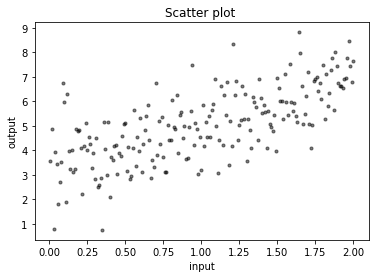

In [39]:
import matplotlib.pyplot as plt
colors = (0,0,0)
area = np.pi*3
# Plot
plt.scatter(in_data, out_data, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot ')
plt.xlabel('input')
plt.ylabel('output')
plt.show()

### (b)

In [40]:
#load data (.dat)
import numpy as np
def dat_to_np(filename):
    data = []
    with open(filename, 'r') as f:
        d = f.readlines()
        for i in d:
            k = i.rstrip().split(",")
            for i in k:#remove the empty ones
                try:
                    data.append([float(i)]) 
                except:
                    pass
    data = np.array(data, dtype='O')
    return data

In [41]:
inp=dat_to_np(filename_0)
out=dat_to_np(filename_1)

In [42]:
N = inp.shape[0]
new_inp = np.ones((N,2))
new_inp[:,1:] = inp

In [43]:
# calculate coefficients using closed-form solution
coeffs = np.linalg.inv(new_inp.transpose().dot(new_inp)).dot(new_inp.transpose()).dot(out)

In [44]:
coeffs

array([[3.244722704171865],
       [1.7815713798289954]], dtype=object)

### (c) cal empirical risk

In [45]:
risk=np.sum(np.square(out-new_inp.dot(coeffs)))/2/N

In [46]:
risk

0.5812605752543938

In [47]:
#get predicted value
out_pred=new_inp.dot(coeffs).flatten()

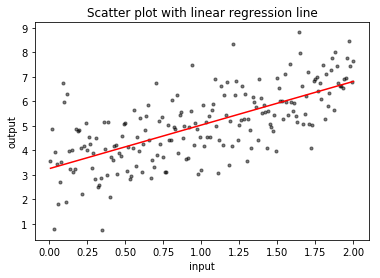

In [48]:
import matplotlib.pyplot as plt
colors = (0,0,0)
area = np.pi*3
# Plot
plt.scatter(in_data, out_data, s=area, c=colors, alpha=0.5)
plt.plot(in_data,out_pred,color="red")
plt.title('Scatter plot with linear regression line')
plt.xlabel('input')
plt.ylabel('output')
plt.show()

### (d) gradient descent

In [49]:
out[0]

array([3.5576671], dtype=object)

In [50]:
#GD
rate1=0.01
num_iter1=100
def GD(w,x,y,rate):
    loss=0
    grad=0
    for i in range(N):
        loss+=np.square(np.dot(x[i],w)-y[i][0])/2
        #import pdb; pdb.set_trace()
        grad=grad+rate*(np.dot(w,x[i])-y[i][0])*x[i]
    w-=grad/N
    err=loss/N
    return err,w
w=np.zeros(2)
ls_w=[]
ls_e=[]

for i in range(num_iter1):
    err_n,w=GD(w,new_inp,out,rate1)
    if i%10==0:
        print("iter "+str(i)+" err:"+str(err_n))
    ls_e.append(err_n)
    ls_w.append(w)
print("\n weight with least loss:")
ls_w[np.argmin(ls_e)]

iter 0 err:13.78687607332783
iter 10 err:9.103876640732983
iter 20 err:6.095921989654887
iter 30 err:4.163437117209215
iter 40 err:2.9214753257106914
iter 50 err:2.12288789518859
iter 60 err:1.6089966602020542
iter 70 err:1.2779242931446217
iter 80 err:1.0642613756693775
iter 90 err:0.926012035150364

 weight with least loss:


array([2.12796385, 2.23076713])

### (e)SGD

In [54]:
import random
#use gradient descent to min risk
#gd(UPDATE PER BATCH(All samples)) VS SGD (updates every sample)
rate2=0.01
num_iter2=50

#shuffle 
def SGD(w,x,y,rate):
    loss=0
    li = list(range(N))
    random.shuffle(li)
    for j in range(N):
        i=li[j]
        w=w-rate*(np.dot(w,x[i])-y[i][0])*x[i]
    for k in range(N):
        loss+=np.square(np.dot(x[k],w)-y[k][0])/2    
    dg_err=str(loss/N)
    return dg_err,w
w=np.zeros(2)
for i in range(num_iter2):
    dg_err,w=SGD(w,new_inp,out,rate2)
    if i%10==0:
        print("iter "+str(i)+" err:"+str(dg_err))
    

iter 0 err:0.6543216876115884
iter 10 err:0.5829148603873597
iter 20 err:0.5845635949399477
iter 30 err:0.585330199461417
iter 40 err:0.5820634408836899


#### you can reshuffle by re-run the above cell. different starting loss

### (f)PolyRegress

In [59]:
# func for x2,x3....xd for polynomial regression
def get_new_inp(inp,d):
    #add 1
    N = inp.shape[0]
    new_inp = np.ones((N,2))
    new_inp[:,1:] = inp
    #add others
    for i in range(2,d+1):
        add_inp=inp**i
        new_inp=np.append(new_inp, add_inp, axis=1)
    new_inp = new_inp.astype(float)
    return new_inp
    
def PolyRegress(inp,out,d):
    new_inp=get_new_inp(inp,d)
    # calculate coefficients using closed-form solution
    coeffs = np.linalg.inv(new_inp.transpose().dot(new_inp)).dot(new_inp.transpose()).dot(out)
    return coeffs
new_coeffs=PolyRegress(inp,out,2)

### (g)quadratic 

In [65]:
new_coeffs

array([[3.5807691544295617],
       [0.7834136067863395],
       [0.4965959069864096]], dtype=object)

In [61]:
#cal new errors
#cal empirical risk
new_2_inp=get_new_inp(inp,2)
new_risk=np.sum(np.square(out-new_2_inp.dot(new_coeffs)))/2/N
new_risk#training error:
#old risk is 0.5812605752543938, lowered

0.5703016121648222

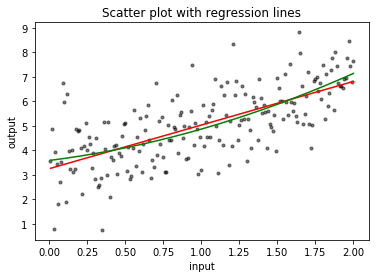

In [63]:
#get predicted value
new_out_pred=new_2_inp.dot(new_coeffs).flatten()
#plot graph--4th order
colors = (0,0,0)
area = np.pi*3
# Plot
plt.scatter(in_data, out_data, s=area, c=colors, alpha=0.5)
plt.plot(in_data,out_pred,color="red")
plt.plot(in_data,new_out_pred,color="green")#quadratic
plt.title('Scatter plot with regression lines')
plt.xlabel('input')
plt.ylabel('output')
plt.show()

#### quadratic is a better fit.
#### after iterations: no increase in error for 2nd to 9th order
#### but error increases at 11th error

In [84]:
def repeat(inp,out,d1,d2):
    rl=[]
    for i in range(d1,d2+1):
        new_coeffs=PolyRegress(inp,out,i)
        #cal empirical risk
        new_inp=get_new_inp(inp,i)
        new_risk=np.sum(np.square(out-new_inp.dot(new_coeffs)))/2/N
        #pred value
        print(str(i)+"th order has erorr "+str(new_risk))
        rl.append(new_risk)
    return rl

3th order has erorr 0.570084436469135
4th order has erorr 0.5646163879286429
5th order has erorr 0.56389681847492
6th order has erorr 0.5613433038902962
7th order has erorr 0.5562352515821012
8th order has erorr 0.5537805799554211
9th order has erorr 0.5529231091067474
10th order has erorr 0.5526264028125286
11th order has erorr 0.6936293161351056
12th order has erorr 1.067316225124267
13th order has erorr 7.566036384319469
14th order has erorr 2.4772601465948965
15th order has erorr 32.59930765288999
16th order has erorr 121.2362581211491
17th order has erorr 185.1430308776857
18th order has erorr 360.2420939170471
19th order has erorr 2574.871433745225
20th order has erorr 4889.087783540116
21th order has erorr 361.7913421960336
22th order has erorr 11501.645391914211
23th order has erorr 177675.86174917
24th order has erorr 93765.28964385578
25th order has erorr 3513.721401166445
26th order has erorr 161722.19141819174
27th order has erorr 106.77621304598674
28th order has erorr 373

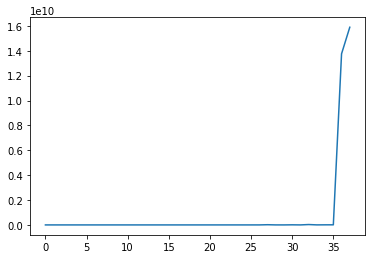

In [87]:
rl=repeat(inp,out,3,40)
plt.plot(list(range(40-3+1)),rl)

In [75]:
record=repeat(inp,out,3,9)
#the error turns worse at 11th iteration

3th order has erorr 0.570084436469135
4th order has erorr 0.5646163879286429
5th order has erorr 0.56389681847492
6th order has erorr 0.5613433038902962
7th order has erorr 0.5562352515821012
8th order has erorr 0.5537805799554211
9th order has erorr 0.5529231091067474


In [76]:
record=repeat(inp,out,9,15)#11th order first decrease

9th order has erorr 0.5529231091067474
10th order has erorr 0.5526264028125286
11th order has erorr 0.6936293161351056
12th order has erorr 1.067316225124267
13th order has erorr 7.566036384319469
14th order has erorr 2.4772601465948965
15th order has erorr 32.59930765288999


## Q3 Ridge regression

### (a)

In [133]:
import pandas as pd
filename_3=r"C:\Users\gaoyu\Desktop\hw1\data\3\hw1_ridge_x.dat"
filename_4=r"C:\Users\gaoyu\Desktop\hw1\data\3\hw1_ridge_y.dat"

In [134]:
def dat_to_np2(filename):
    data = []
    with open(filename, 'r') as f:
        d = f.readlines()
        for i in d:
            line=[]
            k = i.rstrip().split(",")
            for i in k:#remove the empty ones
                try:
                    line.append([float(i)]) 
                except:
                    pass
            data.append(line)
    data = np.array(data, dtype='O')
    return data.reshape(data.shape[0],data.shape[1])
x3=dat_to_np2(filename_3)
y3=dat_to_np2(filename_4)

In [135]:
#split val and train
x_val=x3[0:10]
y_val=y3[0:10]
x_t=x3[-40:]
y_t=y3[-40:]

In [136]:
def regu_coeff(x_t,y_t,regu):
    k=x_t.T.dot(x_t)
    N=x_t.shape[0]
    temp=regu*np.eye(k.shape[0],dtype=float)*N+k
    temp=temp.astype(float)
    re_coeff=np.linalg.inv(temp).dot(x_t.T).dot(y_t)
    return re_coeff
relu=0.15
regu_coeff(x_t,y_t,relu)

array([[-0.5793982548397285],
       [1.1503302802459854],
       [0.049341217635612535],
       [-1.5986789607179286]], dtype=object)

### (b)

In [142]:
def test():
    v_ls=[]
    t_ls=[]
    regu_ls=[]
    order=np.arange(0,-5.1,-0.1)
    for i in order:
        regu=10**i
        risk_val=np.sum(np.square( x_val.dot(regu_coeff(x_t,y_t,regu))-y_val)  )/2/x_val.shape[0]
        risk_t=np.sum(np.square( x_t.dot(regu_coeff(x_t,y_t,regu))-y_t ))/2/x_t.shape[0]
        v_ls.append(risk_val)
        t_ls.append(risk_t)
        regu_ls.append(i)
    return [v_ls,t_ls,regu_ls]

In [144]:
losses=test()

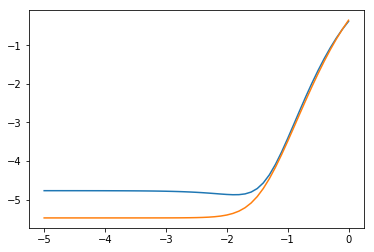

In [145]:
import matplotlib.pyplot as plt
plt.plot(losses[2],np.log(losses[0]))#valia
plt.plot(losses[2],np.log(losses[1]))#train

#### below gives smallest validation loss

In [147]:
10**(losses[2][np.argmin(losses[0])])

0.012589254117941668